In [261]:
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
df = pd.read_csv('data/simulations/raw/40km.txt', sep='\t')
df = df.drop([0, 1], axis=0)
df = df.astype(float)

In [263]:
import numpy as np

from spatz.dataset import T1, T2, T3
from math import pi

# Rename the columns
df = df.rename({
    'Time': 'time',
    'Phase': 'phase',
    'acceleration_without_gravity_x~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'ax_B',
    'acceleration_without_gravity_y~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'ay_B',
    'acceleration_without_gravity_z~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'az_B',
    'gravity_force_x~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'gx_B',
    'gravity_force_y~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'gy_B',
    'gravity_force_z~STAHR_Rocket#B~STAHR_Rocket@STAHR_Rocket': 'gz_B',
    'acceleration_without_gravity_radial~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket': 'ax_L',
    'acceleration_without_gravity_east~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket': 'ay_L',
    'acceleration_without_gravity_north~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket': 'az_L',
    'velocity_r~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket': 'vx_L',
    'velocity_east~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket': 'vy_L',
    'velocity_north~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket': 'vz_L',
    'velocity_r~STAHR_Rocket#L~STAHR_Rocket:Earth@STAHR_Rocket': 'vx_L',
    'latitude~STAHR_Rocket#PCPF~Earth@Earth': 'latitude',
    'longitude~STAHR_Rocket#PCPF~Earth@Earth': 'longitude',
    'declination~STAHR_Rocket#PCPF~Earth@Earth': 'declination',
    'altitude~STAHR_Rocket@Earth': 'altitude',
    'pitch~STAHR_Rocket#L~STAHR_Rocket:Earth': 'pitch_l',
    'yaw~STAHR_Rocket#L~STAHR_Rocket:Earth': 'yaw_l',
    'roll~STAHR_Rocket#L~STAHR_Rocket:Earth': 'roll_l',
    'atmos_pressure~STAHR_Rocket': 'pressure',
    'atmos_temperature~STAHR_Rocket': 'temperature',
    'sonic_velocity~STAHR_Rocket': 'sonic_velocity',
    'OMEGA_X~STAHR_Rocket': 'OMEGA_X',
    'OMEGA_Y~STAHR_Rocket': 'OMEGA_Y',
    'OMEGA_Z~STAHR_Rocket': 'OMEGA_Z',
    'drag~STAHR_Rocket': 'drag',
    'flightpath_speed~STAHR_Rocket': 'flightpath_speed',
    'mass_total~STAHR_Rocket': 'mass_total',
    'mach~STAHR_Rocket': 'mach',
    'gravity~STAHR_Rocket': 'gravity'
}, axis=1)

df['gx_B'] /= (df['mass_total'] * 1000)
df['gy_B'] /= (df['mass_total'] * 1000)
df['gz_B'] /= (df['mass_total'] * 1000)

df['vx_L'] *= 1000
df['vy_L'] *= 1000
df['vz_L'] *= 1000

df['altitude'] *= 1000

pos = np.array([df.at[2, 'altitude'], 0, 0])
px, py, pz, acc_total = [0], [0], [0], [df.at[2, 'gravity']]

for i in range(3, len(df)+2):
    dt = df.at[i, 'time'] - df.at[i-1, 'time']

    acc = np.array([df.at[i, 'ax_L'], df.at[i, 'ay_L'], df.at[i, 'az_L']])
    acc += np.array([-df.at[i, 'gravity'], 0, 0])
    vel = np.array([df.at[i, 'vx_L'], df.at[i, 'vy_L'], df.at[i, 'vz_L']])

    pos += dt * vel + 1/2*dt**2*acc
    px.append(pos[0])
    py.append(pos[1])
    pz.append(pos[2])
    acc_total.append(np.linalg.norm(acc))

df.insert(0, 'px_L', px)
df.insert(0, 'py_L', py)
df.insert(0, 'pz_L', pz)
df.insert(0, 'acc_total', acc_total)


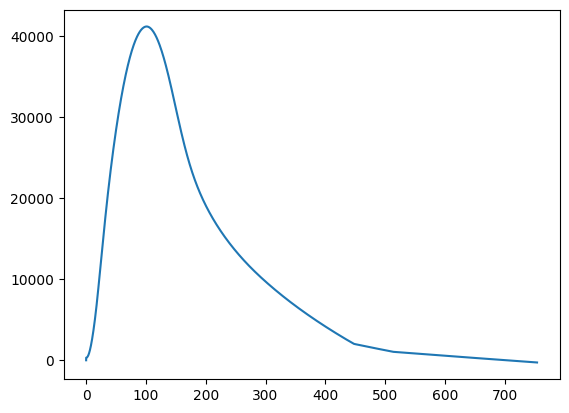

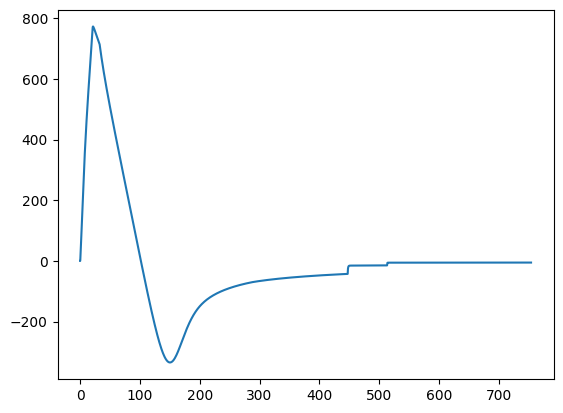

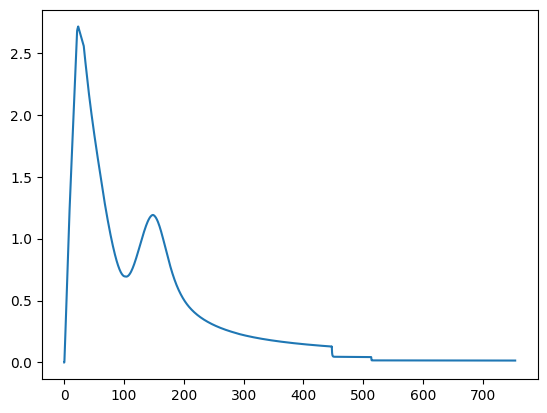

In [264]:
plt.plot(df['time'], df['px_L'], label='alt')
plt.show()
plt.plot(df['time'], df['vx_L'], label='speed')
plt.show()
plt.plot(df['time'], df['mach'], label='mach')
plt.show()

In [265]:
df_new = df[[
    'time',
    'phase',
    'declination',
    'longitude',
    'latitude',
    'altitude',
    'ax_B',
    'ay_B',
    'az_B',
    'gx_B',
    'gy_B',
    'gz_B',
    'ax_L',
    'ay_L',
    'az_L',
    'vx_L',
    'vy_L',
    'vz_L',
    'pitch_l',
    'yaw_l',
    'roll_l',
    'pressure',
    'temperature',
    'sonic_velocity',
    'mach',
    'OMEGA_X',
    'OMEGA_Y',
    'OMEGA_Z',
    'mass_total',
    'flightpath_speed', 
    'acc_total', 
    'drag'
]]

df_new['pitch_l'] *= np.pi / 180
df_new['yaw_l'] *= np.pi / 180
df_new['roll_l'] *= np.pi / 180

df_new['declination'] *= np.pi / 180
df_new['longitude'] *= np.pi / 180
df_new['latitude'] *= np.pi / 180

descriptions = pd.DataFrame.from_dict({
    'time': ['Second'],
    'phase': [None],
    'declination': ['Radians'],
    'longitude': ['Radians'],
    'latitude': ['Radians'],
    'altitude': ['Meter'],
    'ax_B': ['m/s2'],
    'ay_B': ['m/s2'],
    'az_B': ['m/s2'],
    'gx_B': ['m/s2'],
    'gy_B': ['m/s2'],
    'gz_B': ['m/s2'],
    'ax_L': ['m/s2'],
    'ay_L': ['m/s2'],
    'az_L': ['m/s2'],
    'vx_L': ['m/s'],
    'vy_L': ['m/s'],
    'vz_L': ['m/s'],
    'px_L': ['m'],
    'py_L': ['m'],
    'pz_L': ['m'],
    'acc_total': ['m/s2'],
    'pitch_l': ['Radians'],
    'yaw_l': ['Radians'],
    'roll_l': ['Radians'],
    'atmos_pressure': ['Pascal'],
    'atmos_temperature': ['Kelvin'],
    'sonic_velocity': ['Meter / Second'],
    'mach': [None],
    'OMEGA_X': ['Radian / Second'],
    'OMEGA_Y': ['Radian / Second'],
    'OMEGA_Z': ['Radian / Second'],
    'mass_total': ['Mega-Gram'],
    'flightpath_speed': ['Kilo-Meter / Second'], 
    'acc_total': ['Meter/Second**2'], 
    'drag': ['Kilo-Newton'],
    'gravity': ['m/s2']
}, dtype=str)

df_new.to_csv('data/simulations/40km.csv')

C:\Users\Dario\AppData\Local\Temp\ipykernel_19092\1329883484.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['pitch_l'] *= np.pi / 180
C:\Users\Dario\AppData\Local\Temp\ipykernel_19092\1329883484.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['yaw_l'] *= np.pi / 180
C:\Users\Dario\AppData\Local\Temp\ipykernel_19092\1329883484.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See